In [1]:
import math
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy.optimize import minimize
import time

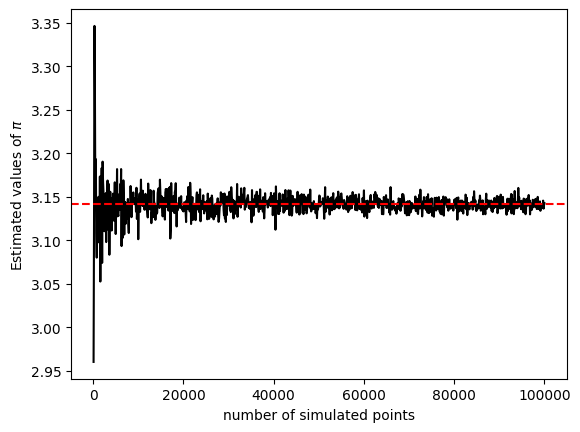

In [8]:
###############
#Exercise 1 
###############

def estimate_pi(N):
    X=np.random.uniform(0,1,(N,2))
    nb_point_in = np.sum(np.sum(X**2,1)<=1)
    return 4*nb_point_in/N

N = np.arange(100,100100,100)
y = [estimate_pi(n) for n in N]
plt.plot(N,y,color = 'k')
plt.axhline(y=np.pi, color='r', linestyle='--', label='$\pi$')
plt.xlabel('number of simulated points')
plt.ylabel('Estimated values of $\pi$')
plt.show()




In [3]:
#####################
# Exercise 2
#####################

# Set the number of times to run the coin flip game
num_runs = 10  # Select the desired number of runs

# Initialize the counter for heads
heads_count = 0

for r in range(num_runs):
    
    # Ensure correct input from the user
    input_selected = False
    while not input_selected:
        h = input('Heads or tails? ').lower()
        input_selected = h in ['heads', 'tails', 'h', 't']
        if not input_selected:
            print('Please enter either heads or tails.')

    # Simulate a coin flip
    coin = 'heads' if np.random.uniform() < 0.5 else 'tails'

    # Determine the outcome
    result = 'You win!' if coin.startswith(h[0]) else 'You lose!'

    # Update the heads count if it's heads
    if coin == 'heads':
        heads_count += 1

    # Display the results
    print('#' * 50)
    print(f'Coin flip result: {coin}')
    print(result)
    print('#' * 50)

print(f'Heads count: {heads_count}/{num_runs}')




Heads or tails?  h


##################################################
Coin flip result: tails
You lose!
##################################################


Heads or tails?  h


##################################################
Coin flip result: tails
You lose!
##################################################


Heads or tails?  h


##################################################
Coin flip result: heads
You win!
##################################################


Heads or tails?  h


##################################################
Coin flip result: tails
You lose!
##################################################


Heads or tails?  h


##################################################
Coin flip result: heads
You win!
##################################################


Heads or tails?  h


##################################################
Coin flip result: heads
You win!
##################################################


Heads or tails?  h


##################################################
Coin flip result: heads
You win!
##################################################


Heads or tails?  h


##################################################
Coin flip result: tails
You lose!
##################################################


Heads or tails?  h


##################################################
Coin flip result: heads
You win!
##################################################


Heads or tails?  h


##################################################
Coin flip result: tails
You lose!
##################################################
Heads count: 5/10


In [13]:
#################
#Exercise 3
#################


N=100000000

# Probability of getting a 6
single_roll = np.random.randint(1,7,size=N)
prb_6 = np.mean(single_roll==6)
print(f'Probability of 6, {prb_6}')


# Probability of getting a 6 for four times in a row 
four_roll = np.random.randint(1,7,size=(N,4))
prb_four_6 = np.mean(np.sum(four_roll==6,1)==4)
print(f'Probability of four 6 in  a row, {prb_four_6}')

# Create a boolean mask for rows where the first three values are 6
mask = (four_roll[:, 0] == 6) & (four_roll[:, 1] == 6) & (four_roll[:, 2] == 6)
subset = four_roll[mask]

prb_6_subset = np.mean(subset[:, 3]==6)
print(f'Probability of having 6 after four 6 in  a row, {prb_6_subset}')


Probability of 6, 0.16666588
Probability of four 6 in  a row, 0.00077335
Probability of having 6 after four 6 in  a row, 0.16676046740801598


In [14]:
#################
#Exercise 4
#################


S=1000000
nb_roll=2
die_rolls = np.random.randint(1,7,size=(S, nb_roll))
sum_of_die = np.sum(die_rolls,axis=1)

results={}
for i in range(np.min(sum_of_die),np.max(sum_of_die)+1):
    results[i]= np.sum(sum_of_die==i)/S
print(results)

# Generate all possible outcomes of two dice rolls
outcomes = np.array([(i, j) for i in range(1, 7) for j in range(1, 7)])
sum_of_outcomes = np.sum(outcomes,axis=1)
probabilities = {}
for p in range(np.min(sum_of_outcomes),np.max(sum_of_outcomes)+1):
    probabilities[p] = np.sum(sum_of_outcomes==p)/len(outcomes)
print(probabilities)

# Compute the difference between probabilities and results
difference = {key: np.abs(probabilities[key] - results[key]) for key in probabilities}
print(difference)


{2: 0.027715, 3: 0.055435, 4: 0.083514, 5: 0.111532, 6: 0.13868, 7: 0.166908, 8: 0.138381, 9: 0.111384, 10: 0.083384, 11: 0.055645, 12: 0.027422}
{2: 0.027777777777777776, 3: 0.05555555555555555, 4: 0.08333333333333333, 5: 0.1111111111111111, 6: 0.1388888888888889, 7: 0.16666666666666666, 8: 0.1388888888888889, 9: 0.1111111111111111, 10: 0.08333333333333333, 11: 0.05555555555555555, 12: 0.027777777777777776}
{2: 6.277777777777618e-05, 3: 0.0001205555555555543, 4: 0.0001806666666666762, 5: 0.0004208888888889012, 6: 0.00020888888888889734, 7: 0.0002413333333333434, 8: 0.0005078888888888911, 9: 0.00027288888888889196, 10: 5.066666666667108e-05, 11: 8.944444444444755e-05, 12: 0.0003557777777777778}


In [15]:
#################
#Exercise 5
#################


h= 1/300
file='gauge.dat'

#reading the data 
data=[]
for line in open(file, 'r'):
    data.append(float(line[:-1]))

eta=np.array(data)

#computing the velocity and the accelaration 
velocity=(eta[2:]-eta[:-2])/(2*h)
accelaration = (eta[2:]-2*eta[1:-1]+eta[:-2])/(h**2)

df=pd.DataFrame(data={'eta':eta})
df.index=df.index*h
df['velocity']=np.append(np.append(np.nan,velocity),np.nan)
df['accelaration']=np.append(np.append(np.nan,accelaration),np.nan)
df.head()



,eta,velocity,accelaration
0.000000,-0.000044,NaN,NaN
0.003333,-0.000029,0.019653,9.227790
0.006667,0.000088,0.005554,-17.687718
0.010000,0.000008,-0.010254,8.203176
0.013333,0.000019,-0.023926,-16.406298


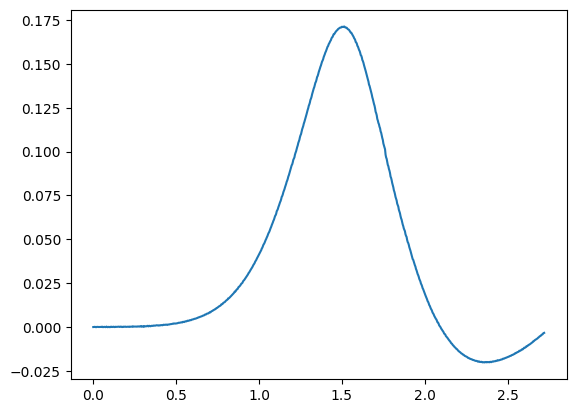

In [16]:
df['eta'].plot()
plt.savefig('eta.png')

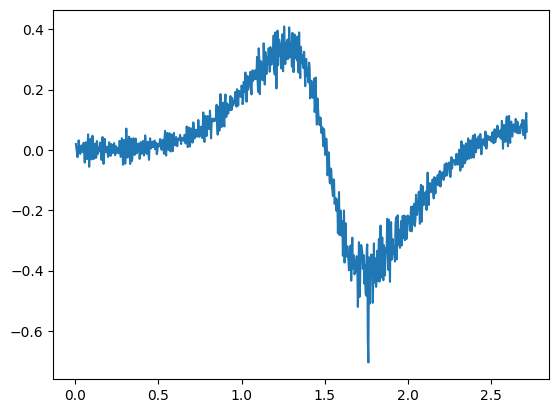

In [17]:
df['velocity'].plot()
plt.savefig('velocity.png')

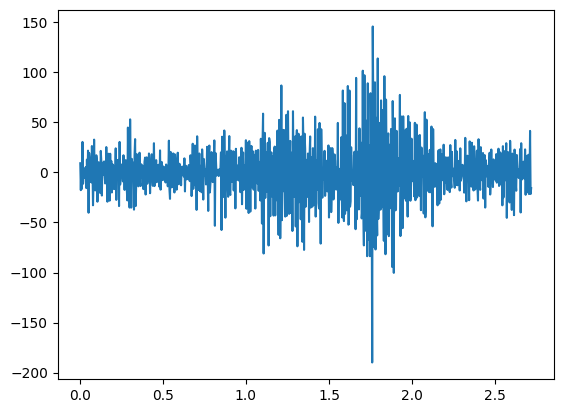

In [18]:
df['accelaration'].plot()
plt.savefig('accelaration.png')

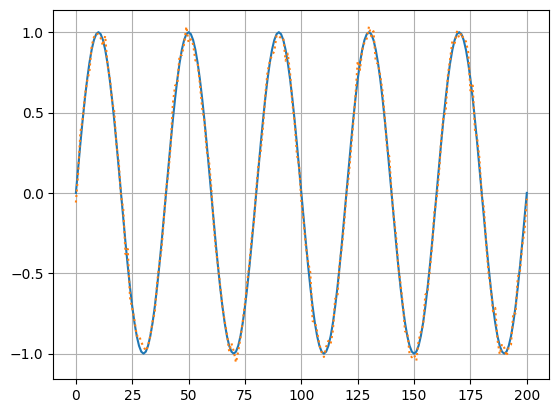

In [2]:
#################
#Exercise 6
#################

# defining parameters 

A=1 
T=2*math.pi
I=np.array(range(201))
t=I*T/40
h=0.0001

def first_derrivative(arr,h):
    return (arr[2:]-arr[:-2])/2*h

def second_derrivative(arr,h):
    return (arr[2:]-arr[1:-1]+arr[:-2])/h**2

#1
eta_bar = A*np.sin(t*2*math.pi/T)

#2
E = np.random.normal(scale=0.04*A,size=eta_bar.shape)

eta = eta_bar + E

plt.plot(eta_bar)
plt.grid(True)
plt.plot(eta,linestyle=':')
plt.savefig('6_1.png')



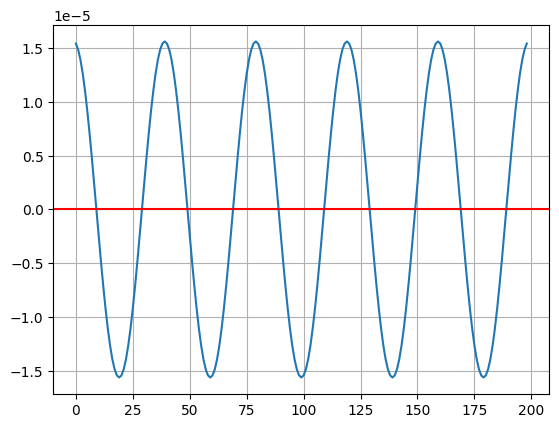

In [3]:
# 3 

d_eta_bar= first_derrivative(arr=eta_bar,h=h)
plt.plot(d_eta_bar)
plt.grid(True)
plt.axhline(0,color='r')
plt.savefig('6_2.png')


In [4]:
# 4 

dE= first_derrivative(arr=E,h=h)
print('mean(dE)',np.mean(dE),'std(dE)',np.std(dE))



mean(dE) -6.098174622932679e-09 std(dE) 2.9060867966850573e-06


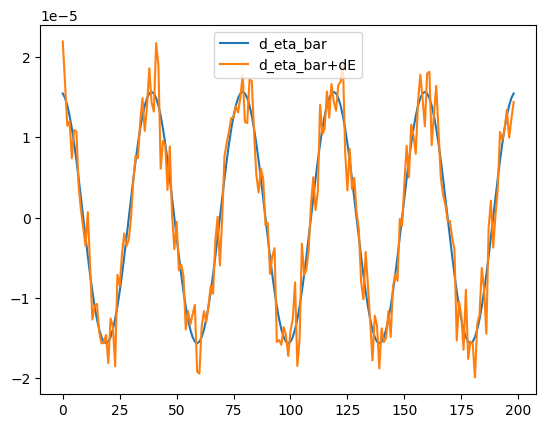

In [5]:
# 5 

plt.plot(d_eta_bar,label='d_eta_bar')
plt.plot(d_eta_bar+dE,label='d_eta_bar+dE')
plt.legend()
plt.savefig('6_3.png')




std(dE) 2.9060867966850573e-06 std(d2E) 8129695.666817039


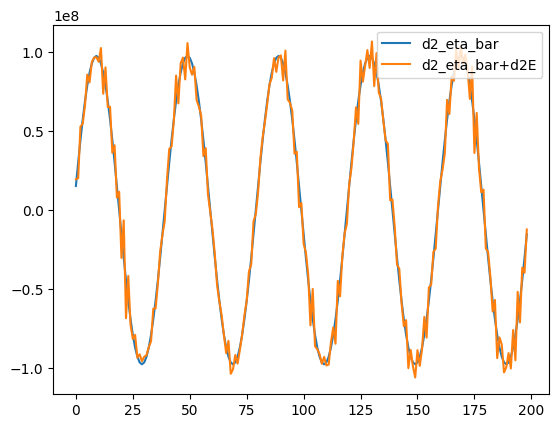

In [7]:
# 6 

d2_eta_bar=second_derrivative(arr=eta_bar,h=h)
d2E=second_derrivative(arr=E,h=h)

plt.plot(d2_eta_bar,label='d2_eta_bar')
plt.plot(d2_eta_bar+d2E,label='d2_eta_bar+d2E')
plt.legend(loc='upper right')
plt.savefig('6_4.png')

print('std(dE)',np.std(dE),'std(d2E)',np.std(d2E))



In [ ]:
#################
#Exercise 7
#################

# Category -> nominal: it can be transformed into a set of dummy variables 
# prize -> numerical 
# kWh/Jahr -> numerical 
# Energy Efficiency -> ordinal: it can be mapped to integer values, implicitly assuming that the differences between adjacent values are uniform
# Weight -> numerical 
# Brand -> nominal 
# Sales -> numerical 


In [20]:
#################
#Exercise 8
#################

file = 'Boston.dat'
#numerical values for the features of the dataset, except for RAD and CHAS 

label =[]

data = []

for line in open(file,'r'):
    item = line.rstrip()
    if '#' in item:
        label.append(item.split()[1])
    else:
        n=[float(x) for x in item.split()]
        data.append(n)

data_final=[]
k=0
while k<len(data):
    data_final.append(data[k]+data[k+1])
    k+=2

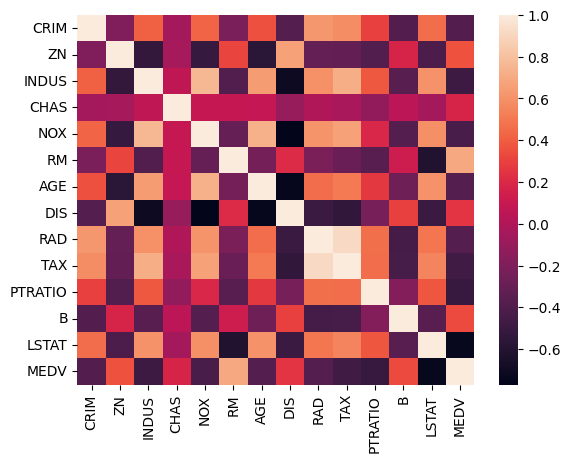

In [21]:
df= pd.DataFrame(data=data_final,columns=label[1:])
corr=df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.savefig('8_1.png')

In [22]:
# randomly select feature for regression
nb_feature = 5 

#it takes the name of the features 
feature = np.random.choice(df.columns[1:],nb_feature, replace=False)
target= df.columns[0]

#defining variables 
X= df[feature].values
y= df[target].values

In [23]:
#Linear Regression
model = LinearRegression()
model = model.fit(X=X,y=y)
params = pd.Series(index=feature, data=model.coef_)
r_squared = metrics.r2_score(y, model.predict(X))
params['r_squared']=r_squared 

In [24]:
#Manual Version
X = np.column_stack((np.ones(len(data_final)), X))
params_manual = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
pred=np.dot(params_manual,X.T)
print(params_manual)
params_manual = pd.Series(index=feature, data=params_manual[1:len(params_manual)])
r_squared_manual = 1 - (np.sum((y-pred)**2))/(np.sum((y-np.mean(y))**2))
params_manual['r_squared']=r_squared_manual                                     

[-4.66889294 -1.09818856 -0.14203475  0.02991098  0.03575688 -0.75145337]


In [25]:
#comparing the two 
comparing_df = pd.DataFrame(data={'skylearn':params,'manual':params_manual})
comparing_df['abs_diff']=comparing_df['skylearn']-comparing_df['manual']
print(comparing_df)

           skylearn    manual      abs_diff
CHAS      -1.098189 -1.098189 -2.442491e-14
INDUS     -0.142035 -0.142035  2.664535e-15
TAX        0.029911  0.029911 -2.151057e-16
AGE        0.035757  0.035757  5.134781e-16
RM        -0.751453 -0.751453  1.099121e-14
r_squared  0.352028  0.352028 -1.110223e-16


In [26]:
#higher-order polynomials 

#nominal and ordinal values could generate multicollinearity and singularity issues
X = df[['ZN', 'AGE', 'DIS']].values
X_poly = np.square(X)
# Concatenate the arrays by row
X_poly = np.hstack([X,X_poly])

#Linear Regression
model_poly = LinearRegression()
model_poly = model_poly.fit(X_poly,y)
params_poly = pd.Series(index=['ZN', 'AGE', 'DIS','ZN^2', 'AGE^2', 'DIS^2'], data=model_poly.coef_)
r_squared = metrics.r2_score(y, model_poly.predict(X_poly))
params_poly['r_squared']=r_squared 

#Manual Version
X_poly = np.column_stack((np.ones(len(data_final)), X_poly))

params_manual = np.dot(np.dot(np.linalg.inv(np.dot(X_poly.T,X_poly)),X_poly.T),y)
pred=np.dot(params_manual,X_poly.T)
r_squared_manual = 1 - (np.sum((y-pred)**2))/(np.sum((y-np.mean(y))**2))
params_manual = pd.Series(index=['ZN', 'AGE', 'DIS','ZN^2', 'AGE^2', 'DIS^2'], data=params_manual[1:len(params_manual)])
params_manual['r_squared']=r_squared_manual  

#comparing the two 
comparing_df = pd.DataFrame(data={'skylearn':params_poly,'manual':params_manual})
comparing_df['abs_diff']=comparing_df['skylearn']-comparing_df['manual']
print(comparing_df)



           skylearn    manual      abs_diff
ZN        -0.005151 -0.005151 -1.520485e-13
AGE       -0.142868 -0.142868 -1.781908e-14
DIS       -5.456076 -5.456076  1.207923e-13
ZN^2       0.000046  0.000046  4.978724e-16
AGE^2      0.001260  0.001260 -1.442423e-15
DIS^2      0.415637  0.415637 -1.232348e-14
r_squared  0.237135  0.237135 -1.110223e-16


In [109]:
#################
#Exercise 9
#################


#defining objective function 
def func(x):
    return x[0]*x[3]*(x[0]+x[1]+x[2])+x[2]


#defining Jacobian 
def func_derr(x):
    dfdx1 = x[3]*(2*x[0]+x[1]+x[2])
    dfdx2 = x[3]*x[0]
    dfdx3 = x[0]*x[3]+1
    dfdx4 = x[0]*(x[0]+x[1]+x[2])
    return np.array([dfdx1,dfdx2,dfdx3,dfdx4])

#defining Hessian 
def func_hess(x):
    m = [
        [2*x[3],x[3],x[3],2*x[0]+x[1]+x[2]],
        [x[3],0,0,x[0]],
        [x[3],0,0,x[0]],
        [2*x[0]+x[1]+x[2],x[0],x[0],0]
    ]
    return np.array(m)





In [110]:
#setting up the maximization problem 

#constraints with their relative jacobian 
cons = ({'type':'eq',
        'fun':lambda x: np.array(np.sum(x**2)-40),
        'jac':lambda x: np.array(x*2)},
        {'type':'ineq',
        'fun':lambda x: np.array(np.prod(x)-25),
        'jac':lambda x: np.array([
            x[1]*x[2]*x[3],
            x[2]*x[3]*x[0],
            x[3]*x[0]*x[1],
            x[0]*x[1]*x[2]
        ])})


#setting boundaries
bound = [(1,5),(1,5),(1,5),(1,5)]


#running the maximization problem provding the hessian and the jacobian 

start = time.time()
res = minimize(func,[1,5,5,1],jac=func_derr,hess=func_hess,constraints=cons,bounds=bound,method='trust-constr',options={'disp': True})
print(res)
time_an=time.time()-start
print('opt.time:',time_an)




`gtol` termination condition is satisfied.
Number of iterations: 35, function evaluations: 26, CG iterations: 45, optimality: 4.65e-09, constraint violation: 2.13e-14, execution time: 0.042 s.
           message: `gtol` termination condition is satisfied.
           success: True
            status: 1
               fun: 17.014017392803012
                 x: [ 1.000e+00  4.743e+00  3.821e+00  1.379e+00]
               nit: 35
              nfev: 26
              njev: 26
              nhev: 26
          cg_niter: 45
      cg_stop_cond: 4
              grad: [ 1.457e+01  1.379e+00  2.379e+00  9.564e+00]
   lagrangian_grad: [-1.998e-15 -3.555e-09  4.645e-09 -6.429e-10]
            constr: [array([-2.132e-14]), array([ 9.686e-08]), array([ 1.000e+00,  4.743e+00,  3.821e+00,  1.379e+00])]
               jac: [array([[ 2.000e+00,  9.486e+00,  7.642e+00,
                             2.759e+00]]), array([[ 2.500e+01,  5.271e+00,  6.543e+00,
                             1.812e+01]]), array([[

In [111]:
#running the maximization problem without providing the hessian and the jacobian 

start = time.time()
res_2 = minimize(func,[1,5,5,1],constraints=cons,bounds=bound,method='trust-constr',options={'disp': True})
print(res_2)
time_fo=time.time()-start
print('opt.time:',time_fo)

print('time gain in %',np.round(100*(time_fo-time_an)/time_fo,2))

#the code is running slower and a bigger number of iterations is required 

`gtol` termination condition is satisfied.
Number of iterations: 56, function evaluations: 235, CG iterations: 73, optimality: 3.74e-09, constraint violation: 0.00e+00, execution time: 0.065 s.
           message: `gtol` termination condition is satisfied.
           success: True
            status: 1
               fun: 17.014017394923503
                 x: [ 1.000e+00  4.743e+00  3.821e+00  1.379e+00]
               nit: 56
              nfev: 235
              njev: 47
              nhev: 0
          cg_niter: 73
      cg_stop_cond: 4
              grad: [ 1.457e+01  1.379e+00  2.379e+00  9.564e+00]
   lagrangian_grad: [-5.107e-15  2.866e-09 -3.745e-09  5.182e-10]
            constr: [array([ 0.000e+00]), array([ 7.317e-08]), array([ 1.000e+00,  4.743e+00,  3.821e+00,  1.379e+00])]
               jac: [array([[ 2.000e+00,  9.486e+00,  7.642e+00,
                             2.759e+00]]), array([[ 2.500e+01,  5.271e+00,  6.543e+00,
                             1.812e+01]]), array([

In [112]:
#manual jacobian and hessian

def jacobian_first_order(x,h=0.05):
    x_0=np.copy(x)
    x_1=np.copy(x)
    x_2=np.copy(x)
    x_3=np.copy(x)
    x_0[0]=x[0]+h
    x_1[1]=x[1]+h
    x_2[2]=x[2]+h
    x_3[3]=x[3]+h
    j=[
        (func(x)-func(x_0))/h,
        (func(x)-func(x_1))/h,
        (func(x)-func(x_2))/h,
        (func(x)-func(x_3))/h
    ]
    return np.array(j)
    

def hess_first_order(x,h=0.05):
    x_0=np.copy(x)
    x_1=np.copy(x)
    x_2=np.copy(x)
    x_3=np.copy(x)
    x_0[0]=x[0]+h
    x_1[1]=x[1]+h
    x_2[2]=x[2]+h
    x_3[3]=x[3]+h
    
    return np.array((
        (jacobian_first_order(x)-jacobian_first_order(x_0))/h,
        (jacobian_first_order(x)-jacobian_first_order(x_1))/h,
        (jacobian_first_order(x)-jacobian_first_order(x_2))/h,
        (jacobian_first_order(x)-jacobian_first_order(x_3))/h
    ))

#maximization problem based on first order approximation of the hessian and of the jacobian 
start = time.time()
res_first_order = minimize(func,[1,5,5,1],jac=jacobian_first_order,hess=hess_first_order,constraints=cons,bounds=bound,method='trust-constr',options={'disp': True})
print(res_first_order)
time_first_order=time.time()-start
print('opt.time:',time_first_order)


#the code is slower and slower and the point estimate is less accurate 



`xtol` termination condition is satisfied.
Number of iterations: 345, function evaluations: 459, CG iterations: 333, optimality: 2.81e-01, constraint violation: 4.95e-06, execution time: 0.13 s.
           message: `xtol` termination condition is satisfied.
           success: True
            status: 2
               fun: 20.283033173984375
                 x: [ 1.296e+00  3.878e+00  4.667e+00  1.224e+00]
               nit: 345
              nfev: 459
              njev: 18
              nhev: 18
          cg_niter: 333
      cg_stop_cond: 2
              grad: [-1.369e+01 -1.587e+00 -2.587e+00 -1.276e+01]
   lagrangian_grad: [-2.712e-01  2.812e-01 -1.361e-01 -8.458e-02]
            constr: [array([ 4.951e-06]), array([ 3.718e+00]), array([ 1.296e+00,  3.878e+00,  4.667e+00,  1.224e+00])]
               jac: [array([[ 2.593e+00,  7.756e+00,  9.335e+00,
                             2.448e+00]]), array([[ 2.215e+01,  7.406e+00,  6.153e+00,
                             2.346e+01]]), arr